In [74]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB

In [2]:
airline_df = pd.read_csv('./data/airline_data.csv')
airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)
airline_df = pd.get_dummies(airline_df, prefix = None, prefix_sep = '_', dummy_na = False, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'], sparse = False, drop_first = False, dtype = None)
columns_drop = ['id', 'Unnamed: 0.1', 'Unnamed: 0']
airline_df.drop(columns_drop, axis=1, inplace = True)


In [3]:
airline_df.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Gender_Female                        0
Gender_Male                          0
Customer Type_Loyal Customer         0
Customer Type_disloyal Customer      0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business           

In [4]:
airline_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [5]:
airline_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,neutral or dissatisfied,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,neutral or dissatisfied,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,satisfied,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,neutral or dissatisfied,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,satisfied,0,1,1,0,1,0,1,0,0


In [6]:
dummies = pd.get_dummies(airline_df["satisfaction"])
dummies.head()

,neutral or dissatisfied,satisfied
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [7]:
airline_df["Satisfied"] = dummies["satisfied"]
airline_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfied
0,13,460,3,4,3,1,5,3,5,5,...,0,1,1,0,0,1,0,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,0,1,0,1,1,0,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,0,1,0,1,0,1,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,1,0,1,0,1,0,1,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0,1,1,0,1,0,1,0,0,1


In [8]:
columns_drop = ['satisfaction']
airline_df.drop(columns_drop, axis=1, inplace = True)
airline_df.head()
airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)

In [9]:
target = airline_df['Satisfied']

In [10]:
input_columns = airline_df.loc[:, airline_df.columns != "Satisfied"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, train_size=0.8)

R:  0.8754196854567945
P:  0.8943852680989348
A:  0.9003784075990424
F:  0.8848008572959457


<AxesSubplot:>

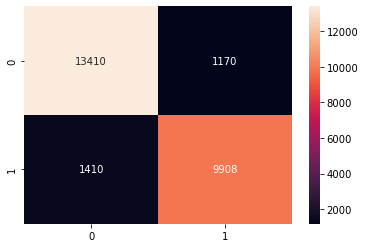

In [75]:
NB_model = CategoricalNB()

NB_model.fit(x_train, y_train)

NB_hat = NB_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test,NB_hat)
precision = sklearn.metrics.precision_score(y_test, NB_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, NB_hat)
f_measure = sklearn.metrics.f1_score(y_test, NB_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, NB_hat), annot=True, fmt='g')

P:  0.6607547464645676
A:  0.7218704147038382


/projects/72aec78b-4035-4aa5-8faa-4d7af1533e7b/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

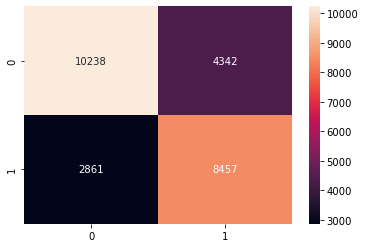

In [39]:
Neural_model = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(20, 20), random_state=1)

Neural_model.fit(x_train, y_train)

Neural_hat = Neural_model.predict(x_test)

precision = sklearn.metrics.precision_score(y_test, Neural_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, Neural_hat)
print("P: ", precision)
print("A: ", accuracy)

sns.heatmap(confusion_matrix(y_test, Neural_hat), annot=True, fmt='g')

P:  0.9746964500880526
A:  0.9584910031662677


<AxesSubplot:>

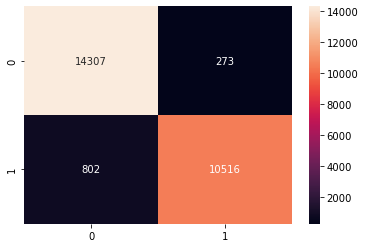

In [77]:
RF_model = RandomForestClassifier(n_estimators=10)

RF_model.fit(x_train, y_train)

RF_hat = RF_model.predict(x_test)

precision = sklearn.metrics.precision_score(y_test, RF_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, RF_hat)
print("P: ", precision)
print("A: ", accuracy)

sns.heatmap(confusion_matrix(y_test, RF_hat), annot=True, fmt='g')

In [68]:
knn_clf = KNN()
tree_clf = DecisionTreeClassifier()
abc_clf = ABC()

In [70]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [71]:
abc_clf.fit(x_train, y_train)

AdaBoostClassifier()

In [72]:
abc_pred = abc_clf.predict(x_test)

[Text(0, 0.5, '0: Not Satisfied'), Text(0, 1.5, '1: Satisfied')]

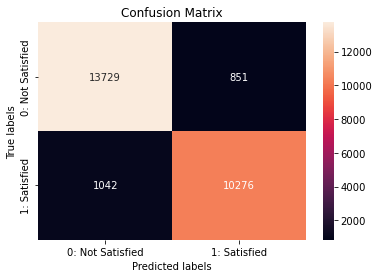

In [73]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, abc_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])



In [37]:
total_squared_error = (np.sum((y_test - abc_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)b

0.07309444744767936


In [0]:
svc = SVC(probability=False)

<u>Models to make:</u>

- knn
- decision tree
- Random forest
- SVC \(DON'T DO THIS ONE YET\)
- Logistic regression 
- Adaboost 
- 

Scoring me
trics:

- f1 score
- Recall
- Precision 
- Accuracy

